# NumPy Basics: Arrays and Vectorized Computation 

NumPy는 내부적으로 데이터를 다른 파이썬 객체와는 구분된 연속된 메모리 블록에 저장한다. Numpy의 각종 알고리즘은 모두 C로 작성되어 타입 검사나 오버헤드 없이 메모리를 직접 조작할 수 있다. 따라서 메모리 사용량이 적고 데이터 처리가 빠르다.

In [1]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [2]:
# list에 비해 Numpy가 빠르다
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 16.1 ms
Wall time: 600 ms


# The NumPy ndarray: A Multidimensional Array Object

In [3]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[ 0.50595138,  0.61038134, -0.11188679],
       [-0.74772426, -0.2225802 ,  0.76452455]])

In [12]:
# Creating ndarrays

data1 = [6, 7.5, 8, 0, 1]
# default는 float64
arr1 = np.array(data1, dtype=np.int32)
arr1

array([6, 7, 8, 0, 1])

In [13]:
# type 변환
float_arr = arr1.astype(np.float64)
float_arr.dtype

dtype('float64')

In [7]:
print(arr1.ndim)
print(arr1.shape)
print(arr1.dtype)

1
(5,)
float64


In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [10]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Boolean Indexing & Fancy Indexing

In [33]:
# Boolean Indexing 
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
data

array([[ 1.14433272,  1.61675648, -0.3859222 ,  0.57408515],
       [-1.21689061,  2.27109078,  0.37695746, -0.05926417],
       [ 1.18238542,  0.69786604,  0.33442559,  0.56508144],
       [ 0.93921213,  1.73554249,  0.14353516,  0.07897307],
       [ 1.5441918 ,  0.2255845 , -1.58828217, -1.51708525],
       [-0.02441825,  1.05512906,  0.25644866, -1.46450818],
       [ 0.2432725 ,  0.79916278,  0.63570971,  0.60992586]])

In [34]:
data[names == 'Bob']

array([[ 1.14433272,  1.61675648, -0.3859222 ,  0.57408515],
       [ 0.93921213,  1.73554249,  0.14353516,  0.07897307]])

In [35]:
data[names == 'Bob', 2:]

array([[-0.3859222 ,  0.57408515],
       [ 0.14353516,  0.07897307]])

In [36]:
data[data < 0] = 0
data

array([[1.14433272, 1.61675648, 0.        , 0.57408515],
       [0.        , 2.27109078, 0.37695746, 0.        ],
       [1.18238542, 0.69786604, 0.33442559, 0.56508144],
       [0.93921213, 1.73554249, 0.14353516, 0.07897307],
       [1.5441918 , 0.2255845 , 0.        , 0.        ],
       [0.        , 1.05512906, 0.25644866, 0.        ],
       [0.2432725 , 0.79916278, 0.63570971, 0.60992586]])

In [46]:
# Fancy indexing, 파이썬 특유의 표현법

arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [38]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [39]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [53]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [54]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

# Array-Oriented Programming with Arrays

배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법을 흔히 벡터화라고 부르는데 일반적으로 벡터화된 배열에 대한 산술 연산은 순수 파이썬 연산에 비해 2~3배, 크게는 수십배까지 빠르다.

In [64]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
# meshgrid는 2개의 1차원 배열을 받아서 가능한 모든 짝을 만들 수 있는 2차원 배열 2개 생성
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [65]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

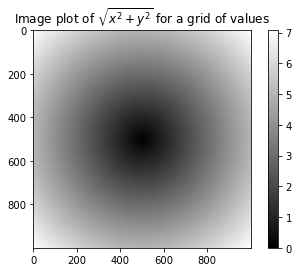

In [66]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [67]:
# Expressing Conditional Logic as Array Operations
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [68]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [70]:
# Mathematical and Statistical Methods
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [72]:
# sorting
arr = np.random.randn(5, 3)
print(arr)
# 1차원 부분만 sort
arr.sort(1)
print(arr)

array([[ 0.63341535, -0.60042523,  0.55710775],
       [ 0.93636147,  0.30851186, -0.11067158],
       [ 1.50518108, -1.71966227,  0.38423815],
       [-1.03406503, -0.54158231, -0.05303325],
       [ 0.47559974, -0.57637206,  0.87886146]])

# Linear Algebra

In [82]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
# 2by3 3by2 
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [94]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
mat

array([[ 9.75887863, -3.3949891 , -0.2743594 ,  2.71391459, -0.64629217],
       [-3.3949891 ,  3.91361727, -0.30198742,  0.67136748,  2.89068704],
       [-0.2743594 , -0.30198742,  4.84600159, -0.53489231,  2.4564439 ],
       [ 2.71391459,  0.67136748, -0.53489231,  4.77916672,  2.87719488],
       [-0.64629217,  2.89068704,  2.4564439 ,  2.87719488,  5.36471866]])

In [95]:
# 역행렬, inverse
inv(mat)

array([[ 0.245551  ,  0.47217871,  0.21408501,  0.01856099, -0.33282539],
       [ 0.47217871,  3.32140531,  2.34237872,  1.79634731, -3.76876075],
       [ 0.21408501,  2.34237872,  2.10698861,  1.63978719, -3.08057329],
       [ 0.01856099,  1.79634731,  1.63978719,  1.71798625, -2.63792185],
       [-0.33282539, -3.76876075, -3.08057329, -2.63792185,  5.00236412]])

In [99]:
# 역행렬 관계의 행렬을 내적 : 단위행렬
np.dot(mat,inv(mat))

array([[ 1.00000000e+00, -7.92041702e-17,  2.23104779e-15,
         7.86159436e-16, -3.10911942e-15],
       [-3.35928952e-15,  1.00000000e+00,  1.50136565e-15,
        -1.83017989e-15, -3.81759484e-15],
       [-1.28676748e-15,  1.33498200e-17,  1.00000000e+00,
         8.81275047e-16, -1.78803099e-15],
       [ 6.40637388e-15,  7.56820133e-17, -2.46252249e-15,
         1.00000000e+00,  3.69915243e-15],
       [ 1.56642415e-15,  5.67455700e-17, -1.92643592e-15,
         5.84481507e-15,  1.00000000e+00]])

In [100]:
# qr 분해
q, r = qr(mat)
r

array([[-11.21922477,  -6.59224718,  -1.89693078,   2.59523054,
          6.02768311],
       [  0.        , -10.89026091,  -0.95664468,  -0.79028939,
          1.1849435 ],
       [  0.        ,   0.        ,  -1.14626822,  -0.75775156,
          0.77094052],
       [  0.        ,   0.        ,   0.        ,  -2.96073939,
          5.5083381 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.09228126]])

# Pseudorandom Number Generation

Numpy 모듈은 난수생성에 있어 Python 모듈보다 수십배 이상 빠르다.

In [103]:
# normal 표준정규분포로부터 추출
samples = np.random.normal(size=(4, 4))
samples

array([[ 2.10166696,  0.70794262,  0.57229345,  0.19209185],
       [ 2.07699202,  0.36441419, -0.44023892, -1.00630834],
       [-0.02596694,  0.71364119,  1.10277907, -1.74841683],
       [ 0.26931658,  0.23804383, -0.87675314, -0.4336714 ]])

In [116]:
# numpy 난수 생성기의 seed 값 변경
np.random.seed(1153)

In [119]:
# 난수 생성기로부터 격리된 난수 생성기 형성
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# Getting Started with pandas

In [120]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

# default는 60개
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20

# These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
# suppress=True : precision에서 값이 0인 경우 0으로 출력 
np.set_printoptions(precision=4, suppress=True)

# Introduction to pandas Data Structures

In [125]:
# Series

obj = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj

d    4
b    7
a   -5
c    3
dtype: int64

In [129]:
obj.values
list(obj.index)

['d', 'b', 'a', 'c']

In [130]:
'b' in obj

True

In [134]:
# dict2Series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [133]:
# 해당하는 States가 있으면 값이 들어간다.
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [155]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [142]:
# dict2DataFrame

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [143]:
# 원하는 컬럼만 선택
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [148]:
# list2DF
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [149]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [153]:
frame2['year']

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [158]:
labels = pd.Index(np.arange(3))
labels
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2
obj2.index is labels

True

In [159]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

# Essential Functionality

In [161]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [162]:
# 새로운 index에 맞도록 객체를 생성
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [160]:
# 시계열과 같은 순차적인 데이터를 재색인할 때 값을 보간하거나 채워 넣어야 할 경우가 있다. method 옵션을 통해 이를 해결 및
# ffill 같은 메서드 통하여 누락된 값을 직전의 값으로 채워넣을 수 있다.
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [163]:
# 로우 변경
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [164]:
# 컬럼 변경
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [171]:
# Selection with loc and iloc

data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [172]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [174]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [175]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [176]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [177]:
data.loc[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32

In [178]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [192]:
# Arithmetic and Data Alignment

df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [193]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [194]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [195]:
# 겹치는 색인이 없는 경우 NaN
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [196]:
# df1, df2 모두 NaN인 경우는 그대로 NaN
df1.add(df2, fill_value=0)

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


In [207]:
# Function Application and Mapping

frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame
# np.abs(frame)

,b,d,e
Utah,0.274992,0.228913,1.352917
Ohio,0.886429,-2.001637,-0.371843
Texas,1.669025,-0.438570,-0.539741
Oregon,0.476985,3.248944,-1.021228


In [208]:
# Series의 최댓값과 최솟값 차이
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.394034
d    5.250581
e    2.374144
dtype: float64

In [209]:
# 각 로우에 대해 수행
frame.apply(f, axis='columns')

Utah      1.124004
Ohio      2.888067
Texas     2.208767
Oregon    4.270171
dtype: float64

In [210]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,0.274992,-2.001637,-1.021228
max,1.669025,3.248944,1.352917


In [214]:
# applymap : df의 실수값을 문자열로 포맷변환

format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.27,0.23,1.35
Ohio,0.89,-2.00,-0.37
Texas,1.67,-0.44,-0.54
Oregon,0.48,3.25,-1.02


In [216]:
# Series는 각 원소에 적용할 함수를 지정하기 위한 map 메서드를 가지고 있음
frame['e'].map(format)

Utah       1.35
Ohio      -0.37
Texas     -0.54
Oregon    -1.02
Name: e, dtype: object

## Sorting and Ranking

In [217]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [221]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'four'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
four,4,5,6,7
three,0,1,2,3


In [222]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
four,5,6,7,4


In [225]:
# Series 객체값에 따라 정렬
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [226]:
# b로 정렬
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [227]:
# 순위
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [228]:
# 즉, 인덱스가 0인 6.5는 6.0
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

# Summarizing and Computing Descriptive Statistics

## Correlation and Covariance

In [230]:
# pandas-datareader에 내장된 데이터셋을 이용하자
conda install pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\isoh1\anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-datareader-0.10.0   |     pyhd3eb1b0_0          71 KB
    ------------------------------------------------------------
                                           Total:          71 KB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.10.0-pyhd3eb1b0_0

The following packages will be UPDATED:

  conda                               4.10.3-py39haa95532_0 --> 4.11.0-py39haa95532_0




pandas-datareader-0. | 71 KB     |            |   0% 
pandas-datareader-0. | 71 KB     | ########## | 100% 
pandas-datareader-0. | 71 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... d

In [231]:
import pandas_datareader.data as web
all_data = {ticker:web.get_data_yahoo(ticker)
           for ticker in ['AAPL','IBM','MSFT','GOOG']}
price = pd.DataFrame({ticker:data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker:data['Volume']
                     for ticker, data in all_data.items()})

In [232]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-03-02,0.020588,0.020684,0.017766,0.004349
2022-03-03,-0.001981,0.016712,-0.014224,-0.003291
2022-03-04,-0.018408,0.005479,-0.020479,-0.016276
2022-03-07,-0.023718,-0.004344,-0.037777,-0.042820
2022-03-07,0.000000,0.000000,0.000000,0.000000


In [233]:
# NA가 아니며 정렬된 색인에서 연속하는 두 Series에 대한 상관관계 계산
returns['MSFT'].corr(returns['IBM'])

0.4815630154503544

In [234]:
# 공분산
returns['MSFT'].cov(returns['IBM'])

0.00014267830644006975

In [235]:
# DataFrame에서 상관관계, cov의 경우 공분산
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.428698,0.743853,0.662824
IBM,0.428698,1.000000,0.481563,0.455184
MSFT,0.743853,0.481563,1.000000,0.783292
GOOG,0.662824,0.455184,0.783292,1.000000


In [236]:
# 다른 Series나 DataFrame과의 상관관계
returns.corrwith(returns.IBM)

AAPL    0.428698
IBM     1.000000
MSFT    0.481563
GOOG    0.455184
dtype: float64

이외에도 unique(), value_counts(), isin([,]) 등의 메서드가 pd.~ 로 자주 이용된다

In [237]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [238]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [239]:
# 다시 초기의 PREVIOUS_MAX_ROWS로 돌린다.
pd.options.display.max_rows = PREVIOUS_MAX_ROWS